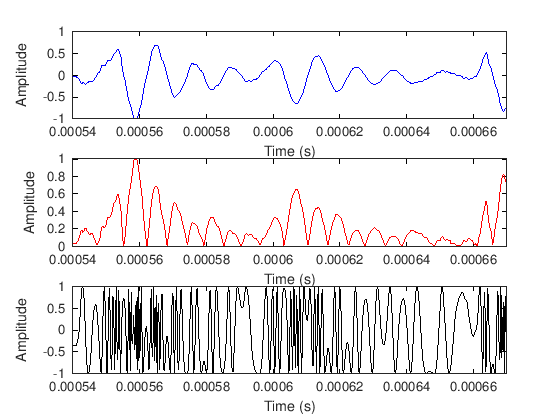

In [1]:
close all; clear all; clc;

% Defining the signals amplitude. 
A_modulating = 1; 
A_carrier = 1; 

% Defining the signals frequency
f_modulating_max = 20000;
f_carrier = 80000;

% modulator sensibility for frequency variation (Hz/volts)
k_f = 2000000;

% Delta variable, correponding to max frequency variation.
d_f = k_f*A_modulating;

% Beta variable, correspondig to percentage of frequency variation about the frequency of the modulating. 
b = d_f/f_modulating_max;

% Defining the period and frequency of sampling: 
fs = 50*f_carrier;
Ts = 1/fs;
T = 1/f_modulating_max;

% Defining the sinal period. 
t_inicial = 0;
t_final = 2;

% "t" vector, correspondig to the time period of analysis, on time domain. 
t = [t_inicial:Ts:t_final];

%modulating_singal = A_modulating *cos(2*pi*f_modulating_max*t);
[modulating_signal, Hs] = audioread('bison.wav');
modulating_signal = transpose(modulating_signal);

% Calculate the number of zeros to be added
num_zeros = length(t) - length(modulating_signal);

% Add the zeros to the end of the modulating_signal vector
modulating_signal = [modulating_signal, zeros(1, num_zeros)];

% Transpose the modulated signal if necessary
modulated_signal = transpose(modulating_signal);

% Creating the FM modulated signal: 
phase_argument = 2*pi*k_f*cumsum(modulating_signal)*(Ts);
modulated_signal = A_carrier * cos(2*pi*f_carrier*t + phase_argument);

% Plot signals on time domain: 
figure(1)
subplot(311)
plot(t, (modulating_signal),'b', 'LineWidth', 2)
xlim([0.00054 0.00067])
xlabel('Time (s)')
ylabel('Amplitude')

subplot(312)
plot(t, abs(modulating_signal),'r', 'LineWidth', 2)
xlim([0.00054 0.00067])
xlabel('Time (s)')
ylabel('Amplitude')

subplot(313)
plot(t, modulated_signal,'k', 'LineWidth', 2)
xlim([0.00054 0.00067])
xlabel('Time (s)')
ylabel('Amplitude')

% calculating the step of the frequency vector "f" (frequency domain); 
f_step = 1/t_final;

% creating the frequency vector "f" (frequency domain); 
f = [-fs/2:f_step:fs/2];

% calculating the FFT of the modulated signal;
modulated_f = fft(modulated_signal)/length(modulated_signal);
modulated_f = fftshift(modulated_f);
